In [1]:
from TREEplus import *

import pandas as pd


In [2]:
import numpy as np
train = np.genfromtxt("Carseats_train.csv", delimiter=',', names=True, dtype=(float,float,float,float, float, float, object, float, float, object, object))



#c = numpy.loadtxt("Carseats_train.csv")
print(type(train))
print(train.dtype)

features_names = train.dtype.names

n_features = train[["ShelveLoc", "US","Urban"]]
n_features_names = n_features.dtype.names
n_features_names

y = train["Price"]

features = train[["Sales", "CompPrice", "Income", "Advertising", "Population", "Age", "Education"]]
features_names = features.dtype.names


indici = np.arange(0, len(y))


<class 'numpy.ndarray'>
[('Sales', '<f8'), ('CompPrice', '<f8'), ('Income', '<f8'), ('Advertising', '<f8'), ('Population', '<f8'), ('Price', '<f8'), ('ShelveLoc', 'O'), ('Age', '<f8'), ('Education', '<f8'), ('Urban', 'O'), ('US', 'O')]


In [3]:
import numpy as np
test = np.genfromtxt("Carseats_test.csv", delimiter=',', names=True, dtype=(float,float,float,float, float, float, object, float, float, object, object))


n_features_test = test[["ShelveLoc", "US","Urban"]]


y_test = test["Price"]

features_test = test[["Sales", "CompPrice", "Income", "Advertising", "Population", "Age", "Education"]]


In [4]:
#when definining a funcion please be aware we are using purity gain or information gain or greatest difference between variance, all positive aspects 
#adding user_defined as a possible impurity_fn and added user_impur to carry that function 
def user_fn(self, node): #impur just takes node in tree
    
    return (mean(self.y[node.indexes])**2)*len(self.y[node.indexes])


In [5]:
node1 = NodeClass('n1', indici) 
tree = TREEplus(y,features,features_names,n_features,n_features_names, impurity_fn = "between_variance", problem="regression", method = "CART",  min_cases_parent= 10,min_cases_child= 5, max_level = 10, twoing = False, surrogate_split = False )

In [6]:
tree.growing_tree(node1, max_k = 5)

Split Found:  n1 [['CompPrice', 127.5, 3784538.433668131, 0]] start <TREEplus.NodeClass object at 0x000001DFE4F650D0> CompPrice>127.5
node_proportion_total  0.20228188075035564
Split Found:  n2 [['Sales', 7.55, 1861259.102354933, 1]] left <TREEplus.NodeClass object at 0x000001DFE4F67690> Sales>7.55
node_proportion_total  0.3046767681766827
Node_proportion_gain  0.10239488742632707
Split Found:  n4 [['Age', 53.5, 1196245.7735961769, 2]] left <TREEplus.NodeClass object at 0x000001DFE50199D0> Age>53.5
node_proportion_total  0.3348077638461362
Node_proportion_gain  0.030130995669453486
Split Found:  n8 [['Income', 67.0, 435776.8626373626, 3]] left <TREEplus.NodeClass object at 0x000001DFE5084290> Income>67.0
node_proportion_total  0.34974725911965104
Node_proportion_gain  0.014939495273514847
Split Found:  n16 [['Age', 40.5, 179045.45238095237, 4]] left <TREEplus.NodeClass object at 0x000001DFE50C90D0> Age>40.5
node_proportion_total  0.35524068739400466
Node_proportion_gain  0.005493428274

((((None, None), (None, None)), (None, ((None, None), None))),
 ((None, None), ((None, None), None)))

In [7]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning) 

start = time.time()
tree.print_tree(table = True, html = False).style.hide()#_index() #print both the pruned and non pruned tree 
#tree.print_tree(table = False, html = False, visual_pruning = True)
#time.time() - start

Node,Node Type,Variable Split,n,Deviance,Explained Deviance,Class/Value
n1,Parent,CompPrice>127.5,280,155526.82,0.202,115.78
n2,Parent,Sales>7.55,162,75946.05,0.305,106.73
n4,Parent,Age>53.5,89,24566.4,0.335,115.71
n8,Parent,Income>67.0,27,6691.63,0.35,126.7
n16,Child,None,13,2462.92,None,117.08
n17,Child,None,14,1905.21,None,135.64
n9,Parent,Sales>2.76,62,13188.6,0.373,110.92
n18,Child,None,6,999.33,None,128.67
n19,Child,None,56,10096.98,None,109.02
n5,Parent,CompPrice>99.0,73,35454.49,0.438,95.78


In [8]:
tree.print_tree(table = False, html = False, visual_pruning = True)

In [9]:
all_node, leaves = tree.cut_tree(11)
tree.print_tree(all_node, leaves, html = False, visual_pruning = True)

To return the table, print_tree must be True: setting print_tree to True
Best tree for test set has 6 leaves with a deviance of: 365.12339845930427 


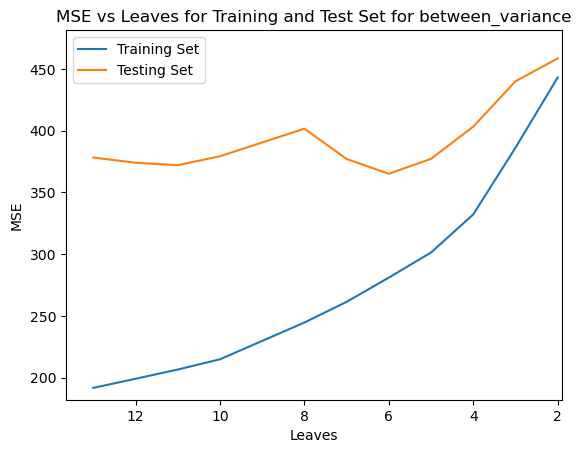

In [10]:
start = time.time()
alpha, pruned_table = tree.pruning(features_test, n_features_test, y_test, table = True, html = False, graph_results = True)
#pruned_table#.style#.hide_index()

#time.time()- start

In [11]:
tree.print_alpha(alpha)

('Alpha = 0', 'value soglia = None', 'deviance = 191.77460919784585', 'leaves = 13')
('Alpha = 2067.2222222222235', "value soglia = ['Sales', 11.879999999999999, 3]", 'deviance = 199.15754570578238', 'leaves = 12')
('Alpha = 2092.2812980030776', "value soglia = ['Sales', 2.755, 3]", 'deviance = 206.6299789129364', 'leaves = 11')
('Alpha = 2323.492266992266', "value soglia = ['Income', 67.0, 3]", 'deviance = 214.9281655807659', 'leaves = 10')
('Alpha = 4167.344350961538', "value soglia = ['Sales', 10.629999999999999, 3]", 'deviance = 244.69491094477667', 'leaves = 8')
('Alpha = 4686.178090558838', "value soglia = ['Age', 53.5, 2]", 'deviance = 261.431261268201', 'leaves = 7')
('Alpha = 5499.0029556650225', "value soglia = ['CompPrice', 135.5, 2]", 'deviance = 281.0705575384331', 'leaves = 6')
('Alpha = 5689.688888888888', "value soglia = ['CompPrice', 146.5, 2]", 'deviance = 301.3908749987506', 'leaves = 5')
('Alpha = 8635.203220129362', "value soglia = ['CompPrice', 99.0, 2]", 'devianc

To return the table, print_tree must be True: setting print_tree to True
Best tree for test set has 6 leaves with a deviance of: 365.12339845930427 


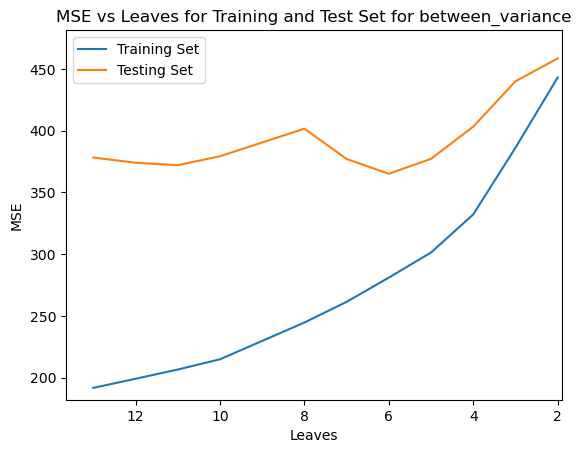

In [12]:
alpha, pruned_table = tree.pruning(features_test, n_features_test, y_test, table = True, html = False, graph_results = True, visual_pruning = True)

In [15]:
tree.print_alpha(alpha)


('Alpha = 0', 'value soglia = None', 'deviance = 191.77460919784585', 'leaves = 13')
('Alpha = 2067.2222222222235', "value soglia = ['Sales', 11.879999999999999, 3]", 'deviance = 199.15754570578238', 'leaves = 12')
('Alpha = 2092.2812980030776', "value soglia = ['Sales', 2.755, 3]", 'deviance = 206.6299789129364', 'leaves = 11')
('Alpha = 2323.492266992266', "value soglia = ['Income', 67.0, 3]", 'deviance = 214.9281655807659', 'leaves = 10')
('Alpha = 4167.344350961538', "value soglia = ['Sales', 10.629999999999999, 3]", 'deviance = 244.69491094477667', 'leaves = 8')
('Alpha = 4686.178090558838', "value soglia = ['Age', 53.5, 2]", 'deviance = 261.431261268201', 'leaves = 7')
('Alpha = 5499.0029556650225', "value soglia = ['CompPrice', 135.5, 2]", 'deviance = 281.0705575384331', 'leaves = 6')
('Alpha = 5689.688888888888', "value soglia = ['CompPrice', 146.5, 2]", 'deviance = 301.3908749987506', 'leaves = 5')
('Alpha = 8635.203220129362', "value soglia = ['CompPrice', 99.0, 2]", 'devianc